Movie Recommender Problem statement
The Dataset

The movies dataset contains metadata for 45,000 movies released on or before July 2017 and listed in the MovieLens database. Features include genre, title, budget, revenue, release dates, languages, production countries and companies, countries, TMDB vote counts and vote averages, and other details. Below are the features information:

Attribute Information:

adult: Indicates if the movie is X-Rated or Adult.

belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.

budget: The budget of the movie in dollars.

genres: A stringified list of dictionaries that list out all the genres associated with the movie.

homepage: The Official Homepage of the move.

id: The ID of the movie.

imdb_id: The IMDB ID of the movie.

original_language: The language in which the movie was originally shot in.

original_title: The original title of the movie.

overview: A brief blurb of the movie.

popularity: The Popularity Score assigned by TMDB.

poster_path: The URL of the poster image.

production_companies: A stringified list of production companies involved with the making of the movie.

production_countries: A stringified list of countries where the movie was shot/produced in.

release_date: Theatrical Release Date of the movie.

revenue: The total revenue of the movie in dollars.

runtime: The runtime of the movie in minutes.

spoken_languages: A stringified list of spoken languages in the film.

status: The status of the movie (Released, To Be Released, Announced, etc.)

tagline: The tagline of the movie.

title: The Official Title of the movie.

video: Indicates if there is a video present of the movie with TMDB.

vote_average: The average rating of the movie.

vote_count: The number of votes by users, as counted by TMDB.

Dataset Source: https://www.kaggle.com/rounakbanik/the-movies-dataset

In [60]:
# Import the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Read the dataset and print first five records.
url = "https://drive.google.com/uc?id=1rPR-P45M2UWsbXc8vpyCzWcQAYUfgVJX"
movies_df = pd.read_csv(url)
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [61]:
# 2: Get the total number of rows and columns, data-types of columns and missing values in the dataset

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

The dataset consists of 45466 rows and 24 columns. A lot of features exhibit missing (or null) values in the dataset.

Our aim is to build three simple recommender systems which recommends:

Top 20 movies having highest popularity.

Top 20 movies having highest average weighted rating.

Top 20 movies of a genre having highest rating.

As our dataset contains a lot of features that are not useful in building the above recommenders, let us create a subset of this dataset that consists of important features like:

genres, id, popularity, title, vote_average, vote_counts

In [62]:
# 3: Create a DataFrame with only required features.

mov_subset_df = movies_df[['genres', 'id', 'popularity', 'title', 'vote_average', 'vote_count']]
mov_subset_df.head()

,genres,id,popularity,title,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,21.946943,Toy Story,7.7,5415.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,17.015539,Jumanji,6.9,2413.0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,11.7129,Grumpier Old Men,6.5,92.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,3.859495,Waiting to Exhale,6.1,34.0
4,"[{'id': 35, 'name': 'Comedy'}]",11862,8.387519,Father of the Bride Part II,5.7,173.0


Data Cleaning

In [63]:
# 4: Identify and display the duplicate entries in the dataset

mov_subset_df[mov_subset_df.duplicated('id', keep = False)].sort_values(by = ['id'])

,genres,id,popularity,title,vote_average,vote_count
676,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",105045,0.122178,The Promise,5.0,1.0
1465,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",105045,0.122178,The Promise,5.0,1.0
44821,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",10991,6.480376,Pokémon: Spell of the Unknown,6.0,144.0
4114,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",10991,10.264597,Pokémon: Spell of the Unknown,6.0,143.0
5710,"[{'id': 18, 'name': 'Drama'}]",109962,12.180836,Rich and Famous,4.9,7.0
20899,"[{'id': 18, 'name': 'Drama'}]",109962,10.396878,Rich and Famous,4.9,7.0
23534,"[{'id': 18, 'name': 'Drama'}]",110428,0.110065,Camille Claudel 1915,7.0,20.0
4356,"[{'id': 18, 'name': 'Drama'}]",110428,0.134014,Camille Claudel 1915,7.0,20.0
24844,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",11115,6.880365,Deal,5.2,22.0
14012,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",11115,6.880365,Deal,5.2,22.0


In [64]:
# 5: Remove and verify the duplicate movie entries

# Drop the duplicate rows on id column
mov_subset_df = mov_subset_df.drop_duplicates(subset = ['id'])

# Verify removal of duplicated entries on id column
mov_subset_df[mov_subset_df.duplicated('id')]

#  Get the total number of rows and columns and data-types of columns.
mov_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45436 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        45436 non-null  object 
 1   id            45436 non-null  object 
 2   popularity    45431 non-null  object 
 3   title         45430 non-null  object 
 4   vote_average  45430 non-null  float64
 5   vote_count    45430 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.4+ MB


In [65]:
# 6: Drop null values from the subset DataFrame
mov_subset_df.dropna(inplace = True)
mov_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45430 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        45430 non-null  object 
 1   id            45430 non-null  object 
 2   popularity    45430 non-null  object 
 3   title         45430 non-null  object 
 4   vote_average  45430 non-null  float64
 5   vote_count    45430 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.4+ MB


In [66]:
# 7 : data-type conversion.

# Convert the type of 'id' column to 'int' type.
mov_subset_df['id'] = mov_subset_df['id'].astype('int')

# Convert the type of 'popularity' column to 'float' type.
mov_subset_df['popularity'] = mov_subset_df['popularity'].astype('float')

# Verify the conversion.
mov_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45430 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        45430 non-null  object 
 1   id            45430 non-null  int32  
 2   popularity    45430 non-null  float64
 3   title         45430 non-null  object 
 4   vote_average  45430 non-null  float64
 5   vote_count    45430 non-null  float64
dtypes: float64(3), int32(1), object(2)
memory usage: 2.3+ MB


In [67]:
# 8:  obtain a list of genres.
from ast import literal_eval
mov_subset_df['genres'] = mov_subset_df['genres'].apply(lambda x: [i['name'] for i in literal_eval(x)])
mov_subset_df.head()

,genres,id,popularity,title,vote_average,vote_count
0,"[Animation, Comedy, Family]",862,21.946943,Toy Story,7.7,5415.0
1,"[Adventure, Fantasy, Family]",8844,17.015539,Jumanji,6.9,2413.0
2,"[Romance, Comedy]",15602,11.712900,Grumpier Old Men,6.5,92.0
3,"[Comedy, Drama, Romance]",31357,3.859495,Waiting to Exhale,6.1,34.0
4,[Comedy],11862,8.387519,Father of the Bride Part II,5.7,173.0


In [68]:
top_20_popular = mov_subset_df.sort_values(by = 'popularity', ascending = False).head(20)
top_20_popular

,genres,id,popularity,title,vote_average,vote_count
30700,"[Family, Animation, Adventure, Comedy]",211672,547.488298,Minions,6.4,4729.0
33356,"[Action, Adventure, Fantasy]",297762,294.337037,Wonder Woman,7.2,5025.0
42222,"[Family, Fantasy, Romance]",321612,287.253654,Beauty and the Beast,6.8,5530.0
43644,"[Action, Crime]",339403,228.032744,Baby Driver,7.2,2083.0
24455,"[Adventure, Family, Animation, Action, Comedy]",177572,213.849907,Big Hero 6,7.8,6289.0
26564,"[Action, Adventure, Comedy]",293660,187.860492,Deadpool,7.4,11444.0
26566,"[Action, Adventure, Comedy, Science Fiction]",283995,185.330992,Guardians of the Galaxy Vol. 2,7.6,4858.0
14551,"[Action, Adventure, Fantasy, Science Fiction]",19995,185.070892,Avatar,7.2,12114.0
24351,"[Action, Thriller]",245891,183.870374,John Wick,7.0,5499.0
23675,"[Mystery, Thriller, Drama]",210577,154.801009,Gone Girl,7.9,6023.0


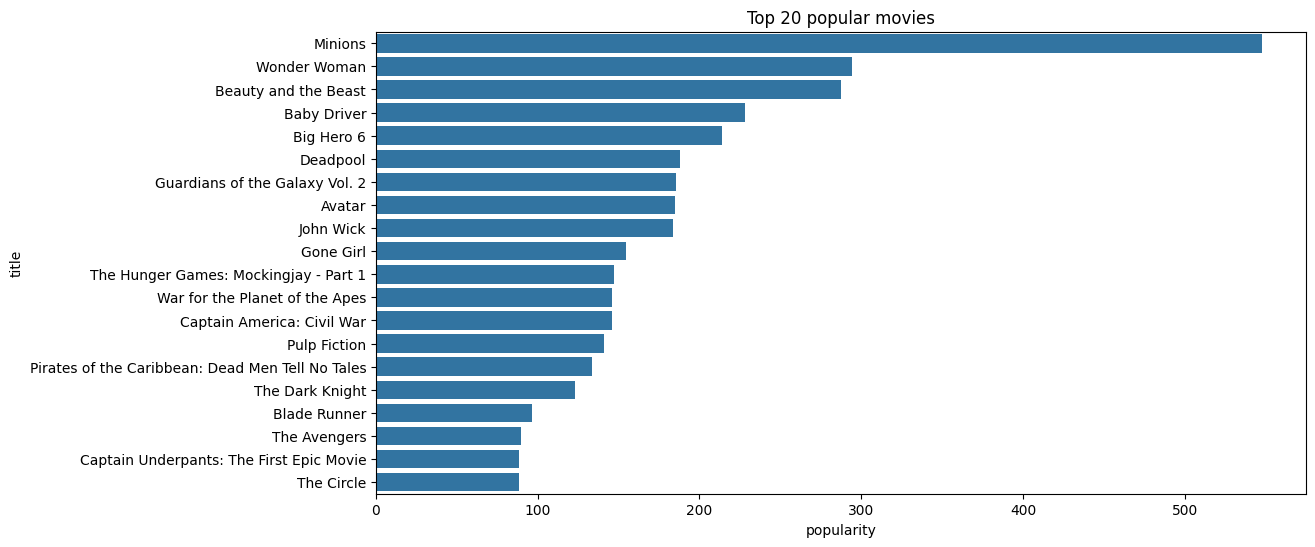

In [69]:
# Plot top 20 popular movies
plt.figure(figsize = (12, 6))
sns.barplot(x='popularity', y= 'title', data = top_20_popular)
plt.title("Top 20 popular movies")
plt.show()

In [70]:
#  Print the number of records and percentage of null values in the 'genres_subset_df' DataFrame
genres_subset_df = mov_subset_df.explode('genres', ignore_index = True)
print('Total movie records: ', genres_subset_df.shape)
print('Null values: ', genres_subset_df['genres'].isna().sum())
print('Percentage of null values:', genres_subset_df['genres'].isna().sum()  * 100 /len(genres_subset_df))

Total movie records:  (93448, 6)
Null values:  2442
Percentage of null values: 2.613218046400137


In [71]:
#Drop the movies with null genres
genres_subset_df.dropna(inplace=True)
print('Null values: ', genres_subset_df['genres'].isna().sum())

Null values:  0


In [72]:
# Obtain the count of movies falling into each genre
genre_count = genres_subset_df['genres'].value_counts()
genre_count

Drama              20243
Comedy             13176
Thriller            7618
Romance             6730
Action              6590
Horror              4670
Crime               4304
Documentary         3930
Adventure           3490
Science Fiction     3042
Family              2767
Mystery             2464
Fantasy             2309
Animation           1930
Foreign             1619
Music               1597
History             1398
War                 1322
Western             1042
TV Movie             765
Name: genres, dtype: int64

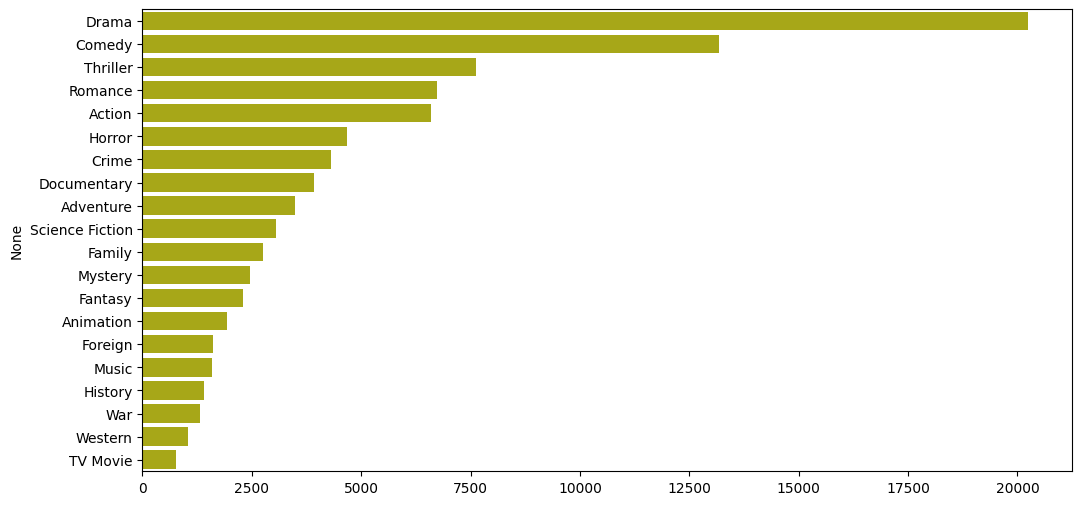

In [114]:
# Create a barplot with number of movies in each genre on x-axis and genre names on y-axis.
plt.figure(figsize=(12,6))
sns.barplot(x=genre_count.values, y=genre_count.index,color='y')
plt.show()

In [74]:
# Create a pivot table to determine the total count of parameters
parameters_df = genres_subset_df[['genres', 'popularity', 'vote_average', 'vote_count']]
genre_table = pd.pivot_table(parameters_df, index =['genres']).reset_index()
genre_table

,genres,popularity,vote_average,vote_count
0,Action,4.773008,5.584932,259.232777
1,Adventure,6.001218,5.687593,410.936390
2,Animation,4.709924,6.275544,234.534715
3,Comedy,3.230777,5.715642,109.106937
4,Crime,4.142982,5.877649,176.028346
5,Documentary,0.948341,5.823028,12.836641
6,Drama,3.010777,5.905888,96.570074
7,Family,4.728138,5.753632,242.281171
8,Fantasy,5.366410,5.790775,333.171503
9,Foreign,0.761960,5.735639,7.984558


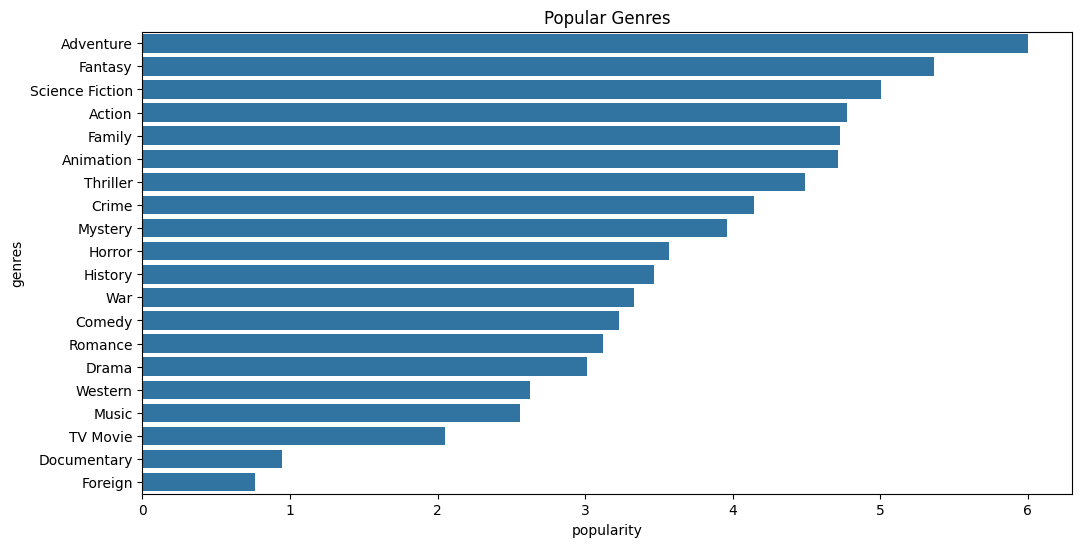

In [75]:
# Plot average popularity score arranged in descending order vs genres
plt.figure(figsize=(12,6))
plt.title("Popular Genres")
sns.barplot(data = genre_table.sort_values('popularity', ascending = False),
            y = 'genres',
            x = 'popularity')
plt.show()

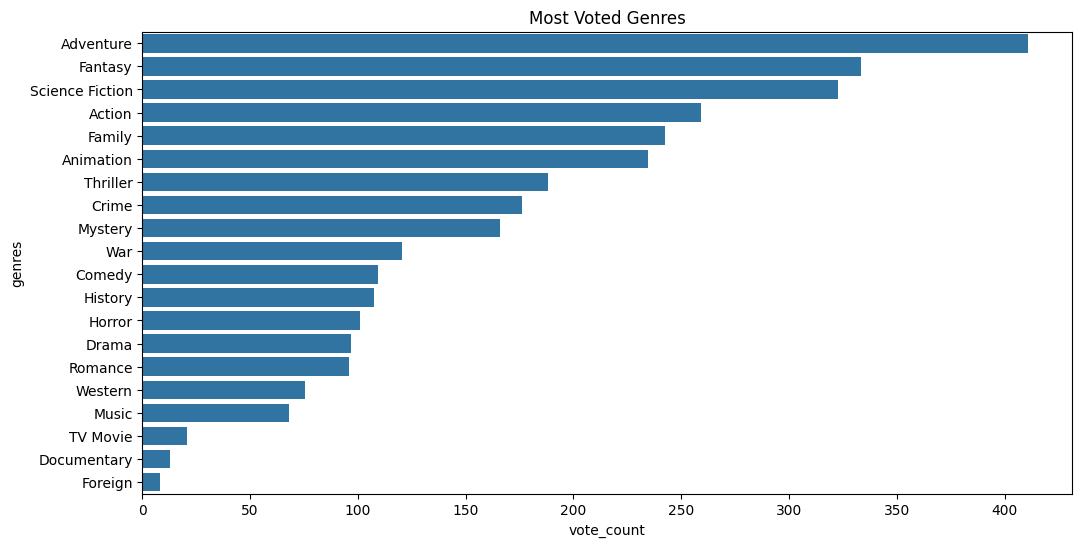

In [76]:
# Plot average  `vote_count` arranged in descending order vs genres

plt.figure(figsize = (12, 6))
plt.title("Most Voted Genres")
sns.barplot(data = genre_table.sort_values('vote_count', ascending = False),
            y = 'genres', x = 'vote_count')
plt.show()

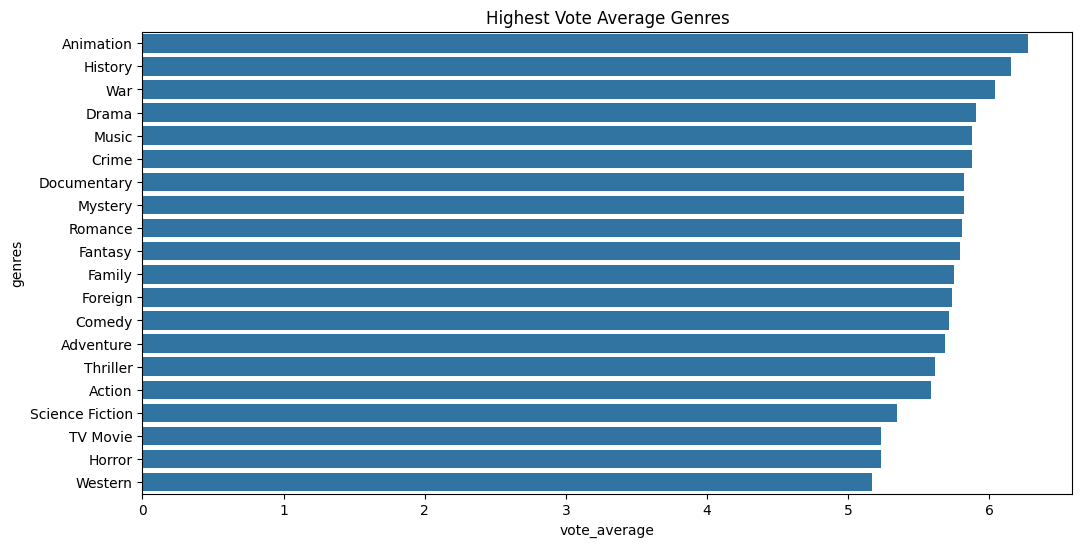

In [77]:
# Plot mean `'vote_average` arranged in descending order vs genres
plt.figure(figsize = (12, 6))
plt.title("Highest Vote Average Genres")
sns.barplot(data = genre_table.sort_values('vote_average', ascending = False),
            y = 'genres', x = 'vote_average')
plt.show()

In [78]:
# Recommend top 20 movies as per average rating of the movie
top_20_va = mov_subset_df.sort_values(by = 'vote_average', ascending = False).head(20)
top_20_va

,genres,id,popularity,title,vote_average,vote_count
41646,[Comedy],401593,0.248238,Big Jay Oakerson: Live at Webster Hall,10.0,1.0
33389,[],134782,0.059830,The Italian Key,10.0,1.0
11385,"[Music, Documentary]",68736,0.035284,Joe Cocker - Mad Dogs & Englishmen,10.0,1.0
41879,[],190605,0.066255,Panorama of Esplanade by Night,10.0,1.0
22395,[Documentary],230864,0.371755,Marvin Hamlisch: What He Did For Love,10.0,1.0
22396,[Documentary],72123,0.091080,Meat the Truth,10.0,1.0
11050,"[Drama, Comedy]",43147,0.090803,Blessed Event,10.0,1.0
33627,[],267178,0.027705,Mad As Hell,10.0,1.0
22578,"[Fantasy, Drama]",89445,0.055097,Eggshells,10.0,1.0
42136,[Comedy],163839,0.153100,The Black Sheep of Whitehall,10.0,1.0


From the above results, you may observe that many of the highest rated movies (vote_average = 10.0) has vote_count = 1.0. This means that the rating 10 was given by only 1 subscriber to these movies.

Hence, we cannot proclaim these movies as highest rated movies as the rating was given by very few subscribers. Thus, we cannot recommend movies to a new subscriber by simply considering vote_average column.

To overcome these shortcomings, we have to consider both average rating and the number of voters. For this we will use the weighted rating formula used by IMDB.

The weighted rating approach ensures that a film with only a few ratings, all at 10, would not rank above "the Godfather", for example, with a 9.2 average from over 500,000 ratings. It is mathematically represented as:

W=(Rv+Cm)/(v+m )

where,

W  is the Weighted Rating.
R  is the average rating of the movie.
v  is the number of votes for the movie.
m  is the minimum votes required to be listed in the top movies list.
C  denotes the mean vote across the whole dataset.

In [79]:
# Calculate mean of 'vote_average' column
C = mov_subset_df['vote_average'].mean()
C

5.618329297820823

In [80]:
# Determine the minimum number of votes for a movie in order to qualify it for recommendation
m = mov_subset_df['vote_count'].quantile(0.9)
m

160.0

In [81]:
# Create a DataFrame of movies having vote_count more than minimum number of votes

qualified_movies_df = mov_subset_df.copy().loc[mov_subset_df['vote_count'] >= m]
qualified_movies_df.head()

,genres,id,popularity,title,vote_average,vote_count
0,"[Animation, Comedy, Family]",862,21.946943,Toy Story,7.7,5415.0
1,"[Adventure, Fantasy, Family]",8844,17.015539,Jumanji,6.9,2413.0
4,[Comedy],11862,8.387519,Father of the Bride Part II,5.7,173.0
5,"[Action, Crime, Drama, Thriller]",949,17.924927,Heat,7.7,1886.0
8,"[Action, Adventure, Thriller]",9091,5.231580,Sudden Death,5.5,174.0


In [82]:
#  Function to computes the weighted rating of each movie
def weighted_rating(df):
    v = df['vote_count']
    R = df['vote_average']

    # Calculation based on the Weighted Rating formula
    W = ((R * v) + (C * m)) / (v + m)
    return W

In [83]:
# Append a column for the weighted rating of the movies in the DataFrame
qualified_movies_df['weighted_rating'] = qualified_movies_df.apply(weighted_rating, axis= 1)
qualified_movies_df.head()

,genres,id,popularity,title,vote_average,vote_count,weighted_rating
0,"[Animation, Comedy, Family]",862,21.946943,Toy Story,7.7,5415.0,7.640257
1,"[Adventure, Fantasy, Family]",8844,17.015539,Jumanji,6.9,2413.0,6.820300
4,[Comedy],11862,8.387519,Father of the Bride Part II,5.7,173.0,5.660759
5,"[Action, Crime, Drama, Thriller]",949,17.924927,Heat,7.7,1886.0,7.537211
8,"[Action, Adventure, Thriller]",9091,5.231580,Sudden Death,5.5,174.0,5.556685


In [84]:
# Display the top 25 movies.
qualified_movies_df.sort_values(by= 'weighted_rating', ascending = False, inplace = True)
qualified_movies_df.head(25)

,genres,id,popularity,title,vote_average,vote_count,weighted_rating
314,"[Drama, Crime]",278,51.645403,The Shawshank Redemption,8.5,8358.0,8.445871
834,"[Drama, Crime]",238,41.109264,The Godfather,8.5,6024.0,8.425442
10309,"[Comedy, Drama, Romance]",19404,34.457024,Dilwale Dulhania Le Jayenge,9.1,661.0,8.421477
12481,"[Drama, Action, Crime, Thriller]",155,123.167259,The Dark Knight,8.3,12269.0,8.265479
2843,[Drama],550,63.869599,Fight Club,8.3,9678.0,8.256387
292,"[Thriller, Crime]",680,140.950236,Pulp Fiction,8.3,8670.0,8.251408
522,"[Drama, History, War]",424,41.725123,Schindler's List,8.3,4436.0,8.206643
23673,[Drama],244786,64.299990,Whiplash,8.3,4376.0,8.205408
5481,"[Fantasy, Adventure, Animation, Family]",129,41.048867,Spirited Away,8.3,3968.0,8.196059
2211,"[Comedy, Drama]",637,39.394970,Life Is Beautiful,8.3,3643.0,8.187177


In [85]:
genre_based_df = qualified_movies_df.explode('genres', ignore_index = True)
genre_based_df.head()

,genres,id,popularity,title,vote_average,vote_count,weighted_rating
0,Drama,278,51.645403,The Shawshank Redemption,8.5,8358.0,8.445871
1,Crime,278,51.645403,The Shawshank Redemption,8.5,8358.0,8.445871
2,Drama,238,41.109264,The Godfather,8.5,6024.0,8.425442
3,Crime,238,41.109264,The Godfather,8.5,6024.0,8.425442
4,Comedy,19404,34.457024,Dilwale Dulhania Le Jayenge,9.1,661.0,8.421477


In [86]:
def genre_recommender(fav_genre):
  recommended_df = genre_based_df[genre_based_df['genres'] == fav_genre]
  return(recommended_df.head(25))

In [87]:
#: Recommend 'Thriller' movies

genre_recommender('Thriller')

,genres,id,popularity,title,vote_average,vote_count,weighted_rating
10,Thriller,155,123.167259,The Dark Knight,8.3,12269.0,8.265479
12,Thriller,680,140.950236,Pulp Fiction,8.3,8670.0,8.251408
35,Thriller,539,36.826309,Psycho,8.3,2405.0,8.132722
41,Thriller,101,20.477329,Leon: The Professional,8.2,4293.0,8.107238
51,Thriller,27205,29.108149,Inception,8.1,14075.0,8.072106
66,Thriller,807,18.457430,Se7en,8.1,5915.0,8.034639
70,Thriller,274,4.307222,The Silence of the Lambs,8.1,4549.0,8.015679
78,Thriller,77,15.450789,Memento,8.1,4168.0,8.008256
80,Thriller,694,19.611589,The Shining,8.1,3890.0,8.001959
82,Thriller,500,12.220340,Reservoir Dogs,8.1,3821.0,8.000259


In [88]:
#: Recommend 'Horror' movies

genre_recommender('Horror')

,genres,id,popularity,title,vote_average,vote_count,weighted_rating
34,Horror,539,36.826309,Psycho,8.3,2405.0,8.132722
79,Horror,694,19.611589,The Shining,8.1,3890.0,8.001959
173,Horror,348,23.377420,Alien,7.9,4564.0,7.822721
324,Horror,1091,16.831250,The Thing,7.8,1629.0,7.604881
328,Horror,679,21.761179,Aliens,7.7,3282.0,7.603234
593,Horror,396535,22.685169,Train to Busan,7.7,984.0,7.408857
645,Horror,578,19.726114,Jaws,7.5,2628.0,7.392013
652,Horror,747,14.902948,Shaun of the Dead,7.5,2479.0,7.385916
676,Horror,9552,12.137595,The Exorcist,7.5,2046.0,7.363523
799,Horror,138843,14.901690,The Conjuring,7.4,3169.0,7.314368


Here we observe that the system has correctly recommended top movies in the adventure genre. Hence, we have successfully designed the basic recommendation engine for our new users.





Let us understand the collaborative filters.

Collaborative filtering builds a model from the user's past behaviour (i.e. items purchased or searched by the user) as well as similar decisions made by other users. This model is then used to predict items that users may have an interest in.


We will build an intelligent recommender that would recommend movies to a customer say X based on the customer's watch history.
First, we need to find other sets of users who have watched same movies along with some other movies and suggest customer X the movies which were appreciated by those sets of users.

Datasets
We will use following three datasets to set up a recommender system that will recommend movies to a user based on ratings given by other users:

1. The movie_metadata.csv file:

This is the main Movies Metadata file.

It contains information on 45,000 movies featured in the Full MovieLens database.

2. The links.csv file:

This file contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

3. The ratings_small.csv file:

This file is a subset of 100,000 ratings from 700 users on 9,000 movies.

In [89]:
#  Create 'movies_df' DataFrame consisting of columns: 'id', 'imdb_id', 'title'
movies_df = movies_df[['id', 'imdb_id', 'title']]
movies_df.head()

,id,imdb_id,title
0,862,tt0114709,Toy Story
1,8844,tt0113497,Jumanji
2,15602,tt0113228,Grumpier Old Men
3,31357,tt0114885,Waiting to Exhale
4,11862,tt0113041,Father of the Bride Part II


In [90]:
#  Drop missing values from the DataFrame.
movies_df.dropna(inplace = True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45443 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       45443 non-null  object
 1   imdb_id  45443 non-null  object
 2   title    45443 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [91]:
#  Convert data type of 'id' column to float
movies_df['id'] = movies_df['id'].astype('float')
movies_df.head()

,id,imdb_id,title
0,862.0,tt0114709,Toy Story
1,8844.0,tt0113497,Jumanji
2,15602.0,tt0113228,Grumpier Old Men
3,31357.0,tt0114885,Waiting to Exhale
4,11862.0,tt0113041,Father of the Bride Part II


In [92]:
#  Load 'links.csv' file into 'links_df' DataFrame.
links_df = pd.read_csv('https://drive.google.com/uc?id=1bcxKJJMhU15qH77BmmdPf4lZwi5k5Cnb')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [93]:
#  Merge 'movies_df' and 'links_df' DataFrames
m_links_df = pd.merge(movies_df, links_df, left_on ='id', right_on ='tmdbId')
m_links_df

,id,imdb_id,title,movieId,imdbId,tmdbId
0,862.0,tt0114709,Toy Story,1,114709,862.0
1,8844.0,tt0113497,Jumanji,2,113497,8844.0
2,15602.0,tt0113228,Grumpier Old Men,3,113228,15602.0
3,31357.0,tt0114885,Waiting to Exhale,4,114885,31357.0
4,11862.0,tt0113041,Father of the Bride Part II,5,113041,11862.0
...,...,...,...,...,...,...
45500,439050.0,tt6209470,Subdue,176269,6209470,439050.0
45501,111109.0,tt2028550,Century of Birthing,176271,2028550,111109.0
45502,67758.0,tt0303758,Betrayal,176273,303758,67758.0
45503,227506.0,tt0008536,Satan Triumphant,176275,8536,227506.0


In [94]:
#  Obtain the final DataFrame consisting of only 'movieId' and 'title' columns.
m_df = m_links_df[['movieId', 'title']]
m_df

,movieId,title
0,1,Toy Story
1,2,Jumanji
2,3,Grumpier Old Men
3,4,Waiting to Exhale
4,5,Father of the Bride Part II
...,...,...
45500,176269,Subdue
45501,176271,Century of Birthing
45502,176273,Betrayal
45503,176275,Satan Triumphant


In [95]:
#  Load 'ratings_small.csv' file into 'ratings_df' DataFrame.
ratings_df = pd.read_csv('https://drive.google.com/uc?id=1DKT6CcjHsdKY9TKKAfk50ic2khf9JbJA')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [96]:
#  Drop 'timestamp' column from 'ratings_df' DataFrame.
ratings_df = ratings_df.drop('timestamp', axis=1)
ratings_df.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [97]:
#: Merge 'm_df' and 'ratings_df' DataFrames.
final_movies_df = pd.merge(m_df, ratings_df, on = 'movieId')
final_movies_df.head()

,movieId,title,userId,rating
0,1,Toy Story,7,3.0
1,1,Toy Story,9,4.0
2,1,Toy Story,13,5.0
3,1,Toy Story,15,2.0
4,1,Toy Story,19,3.0


In [98]:
#  Print top 5 movies having highest mean rating.
final_movies_df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Female Perversions    5.0
Lake of Fire          5.0
Lamerica              5.0
The Family Stone      5.0
Riding Giants         5.0
Name: rating, dtype: float64

In [99]:
#  Print top 5 movies having highest count of ratings.
final_movies_df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Forrest Gump                341
Pulp Fiction                324
The Shawshank Redemption    311
The Silence of the Lambs    304
Star Wars                   291
Name: rating, dtype: int64

In [100]:
# : Create a DataFrame with average rating and number of ratings for each movie.
all_movies_ratings = pd.DataFrame(final_movies_df.groupby('title')['rating'].mean())
all_movies_ratings['num of ratings'] = pd.DataFrame(final_movies_df.groupby('title')['rating'].count())
all_movies_ratings

,rating,num of ratings
title,,
$9.99,3.833333,3
'Neath the Arizona Skies,0.500000,1
"'night, Mother",5.000000,3
(500) Days of Summer,3.755556,45
...And God Created Woman,5.000000,1
...,...,...
À Nous la Liberté,4.500000,1
Æon Flux,2.538462,13
İtirazım Var,3.500000,1


In [101]:
#  Print first 5 rows of final movies DataFrame.
final_movies_df.head()

,movieId,title,userId,rating
0,1,Toy Story,7,3.0
1,1,Toy Story,9,4.0
2,1,Toy Story,13,5.0
3,1,Toy Story,15,2.0
4,1,Toy Story,19,3.0


In [102]:
# Create a pivot table with index ='userId', columns ='title', values ='rating'
user_ratings = final_movies_df.pivot_table(index ='userId', columns ='title', values ='rating')
user_ratings

title,$9.99,'Neath the Arizona Skies,"'night, Mother",(500) Days of Summer,...And God Created Woman,...And Justice for All,1-900,10,10 Attitudes,10 Cloverfield Lane,...,eXistenZ,loudQUIETloud: A Film About the Pixies,xXx,xXx: State of the Union,¡Three Amigos!,À Nous la Liberté,Æon Flux,İtirazım Var,Želary,’Round Midnight
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here, each cell consist of the rating the user gave to that movie. The NaN values indicate that these movies were not watched or rated by that particular user.

To obtain recommendation for similar movies based on the ratings given by other users, we will compute a similarity score. Collaborative filters can use a variety of similarity scores, for example:

Pearson Correlation Coefficient

Cosine Similarity



Collaborative Filtering I - Pearson Correlation Coefficient

For our recommender, we will use Pearson Correlation Coefficient to obtain the similarity score of the movies. 



In [103]:
#  Calculate correlation coefficient between each pair of movies using 'corr()' function.
similarity_df = user_ratings.corr()
similarity_df

title,$9.99,'Neath the Arizona Skies,"'night, Mother",(500) Days of Summer,...And God Created Woman,...And Justice for All,1-900,10,10 Attitudes,10 Cloverfield Lane,...,eXistenZ,loudQUIETloud: A Film About the Pixies,xXx,xXx: State of the Union,¡Three Amigos!,À Nous la Liberté,Æon Flux,İtirazım Var,Želary,’Round Midnight
title,,,,,,,,,,,,,,,,,,,,,
$9.99,1.0,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Neath the Arizona Skies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'night, Mother",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer,1.0,NaN,NaN,1.000000,NaN,-0.327327,NaN,-0.188982,NaN,-0.5,...,NaN,NaN,0.424179,NaN,-0.617213,NaN,0.866025,NaN,NaN,1.0
...And God Created Woman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
À Nous la Liberté,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Æon Flux,NaN,NaN,NaN,0.866025,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,0.251952,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
İtirazım Var,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




Create a user-defined function recommend_movies and pass the movie_name string as input. Inside this function:

Obtain the correlation coefficients of all the movies with the input movie_name by specifying the movie_name as index to the correlation table similarity_df.

This will return a pandas series containing the correlation coefficients. Store this pandas Series in a new DataFrame. Rename the column name to 'correlation'.

Add the number of ratings for each movie to the new DataFrame obtained in the above step using join() function.

Return top 20 highly correlated/similar movies but only those whose num of ratings is greater than 100 .

In [104]:
#Define 'recommend_movies()' function.
def recommend_movies(movie_name):
  similar_movies = similarity_df[movie_name]
  similar_movies_df = pd.DataFrame(similar_movies)
  similar_movies_df.rename(columns = {similar_movies_df.columns[0]: 'correlation'}, inplace = True)
  corr_num_ratings = similar_movies_df.join(all_movies_ratings['num of ratings'])
  return corr_num_ratings[corr_num_ratings['num of ratings'] > 100].sort_values('correlation',ascending = False).head(20)

In [105]:
# Call 'recommend_movies()' function and pass 'Star Wars' as input.
recommend_movies('Star Wars')

,correlation,num of ratings
title,,
Star Wars,1.000000,291
Return of the Jedi,0.747774,217
The Empire Strikes Back,0.700790,234
The Dark Knight,0.549486,121
The Lord of the Rings: The Fellowship of the Ring,0.477582,200
Raiders of the Lost Ark,0.476442,220
The Incredibles,0.450914,126
The Lord of the Rings: The Two Towers,0.448153,188
E.T. the Extra-Terrestrial,0.428289,160


We can see that the top recommendations are pretty good. The movie that has the highest/full correlation to Star Wars is Star Wars itself. The movies such as Return of the Jedi, The Empire Strikes Back and The Dark Knight show high correlation with Star Wars.

Thus, we have successfully built a movie recommender by performing collaborative filtering using Pearson correlation.

Collaborative Filtering II - Cosine Similarity

To personalize the recommendation engine for any User X having a watch history of M movies:

Step 1. We will get the most similar users of the User X.

Step 2. We will get the most similar movies of the movie set M.

Step 3. Then we combine the ratings for each item of the movies for similar users, and the similarity score of the similar users.

Step 4. We will recommend only the items that have higher ratings given by the similar users.



In [106]:
# Predefined user watch history
user_history = [
            {'title':'Hotel Transylvania 2', 'rating':4},
            {'title':"Indiana Jones and the Temple of Doom", 'rating':4.5},
            {'title':"Indiana Jones and the Kingdom of the Crystal Skull", 'rating':4},
            {'title':'Men in Black II', 'rating':4}
         ]
user_history_df = pd.DataFrame(user_history)
user_history_df

,title,rating
0,Hotel Transylvania 2,4.0
1,Indiana Jones and the Temple of Doom,4.5
2,Indiana Jones and the Kingdom of the Crystal S...,4.0
3,Men in Black II,4.0


Here, we observe that the user_history_df consists of the movie title and rating columns. In order to correlate the user watch history with our database, we need to assign the movieId to the respective movies from the database.

First let's look for the title from the user_history_df, find it in moveis_df. For this we will use:

tolist() function from Pandas

DataFrame.isin() method from Pandas

In [107]:
#  Obtain  the list of movie titles the user has watched
watch_list = user_history_df['title'].tolist()
print('The variable watch_list is of: ',type(watch_list))
print(watch_list)

The variable watch_list is of:  <class 'list'>
['Hotel Transylvania 2', 'Indiana Jones and the Temple of Doom', 'Indiana Jones and the Kingdom of the Crystal Skull', 'Men in Black II']


Next, we will search for the movie titles appearing in watch_list in the master dataset we obtained in the previous class: m_links_df to obtain the movieId for the corresponding movies. For this we will use Pandas.isin() method.

In [108]:
#  Obtain a DataFrame consisting of movieId based on user watch history
user_history_id = m_links_df[m_links_df['title'].isin(watch_list)]
user_history_id

,id,imdb_id,title,movieId,imdbId,tmdbId
2014,87.0,tt0087469,Indiana Jones and the Temple of Doom,2115,87469,87.0
5345,608.0,tt0120912,Men in Black II,5459,120912,608.0
12668,217.0,tt0367882,Indiana Jones and the Kingdom of the Crystal S...,59615,367882,217.0
33301,159824.0,tt2510894,Hotel Transylvania 2,142997,2510894,159824.0


From the output we observe that the user_history_id DataFrame now consists of the movieId of the movies the user has watched.

However, to work with collaborative filters we need the user ratings as well. So, Merge the DataFrames: user_history_id, user_history_df to obtain the workable dataset, say: watched_movies_df

In [109]:
# Obtain the movieId and rating DataFrame for the user watch history

watched_movies_df = pd.merge(user_history_id, user_history_df)
watched_movies_df

,id,imdb_id,title,movieId,imdbId,tmdbId,rating
0,87.0,tt0087469,Indiana Jones and the Temple of Doom,2115,87469,87.0,4.5
1,608.0,tt0120912,Men in Black II,5459,120912,608.0,4.0
2,217.0,tt0367882,Indiana Jones and the Kingdom of the Crystal S...,59615,367882,217.0,4.0
3,159824.0,tt2510894,Hotel Transylvania 2,142997,2510894,159824.0,4.0


The watch history dataset watched_movies_df from user now consist of the movie title, rating, and movieId for all the movies user X has watched.

As per the recommendation engine logic , we need to find the subset of other users who have watched and rated the movies from the user X watch history: watched_movies_df.
This can be done in a similar way we searched for the movieId:

In [110]:
#  Creating subset of users that has watched movies from the user watched movies dataframe
watch_list_movieid = watched_movies_df['movieId'].tolist()
users_subset_df = ratings_df[ratings_df['movieId'].isin(watch_list_movieid)]
print('Shape of the users_subset_df DataFrame: ',users_subset_df.shape)
users_subset_df.head(10)

Shape of the users_subset_df DataFrame:  (173, 3)


,userId,movieId,rating
285,4,2115,5.0
1407,15,2115,4.0
1927,15,5459,1.0
2258,15,59615,1.0
3876,22,2115,3.5
3965,22,5459,3.5
4295,23,2115,4.0
5442,30,2115,4.0
7032,41,5459,3.5
7493,48,5459,3.0


Here, we observe that we have obtained a DataFrame for the users subset that has watched movies from the user watch history. For example:

userId 4 has watched the movieId 2115 (Indiana Jones and the Temple of Doom) and rated it 5.0 out of 5.

Similarly, userId 15 has watched 3 movies, with movieId 2115, 5459, and 59615 respectively.


Next, let's group this dataset with respect to users and sort it based on the most number of common movies the subset users have watched. For this:

In [111]:
#  Create users subset group based on userId and sort on base of highest number of common movies watched.
users_subset_group = users_subset_df.groupby(['userId'])
users_subset_group = sorted(users_subset_group,  key=lambda u: len(u[1]), reverse=True)
users_subset_group[0:5]

[(624,
         userId  movieId  rating
  93859     624     2115     4.0
  94331     624     5459     2.0
  94639     624    59615     2.0
  95254     624   142997     2.5),
 (15,
        userId  movieId  rating
  1407      15     2115     4.0
  1927      15     5459     1.0
  2258      15    59615     1.0),
 (73,
         userId  movieId  rating
  10591      73     2115     5.0
  10992      73     5459     2.0
  11435      73    59615     1.5),
 (88,
         userId  movieId  rating
  13636      88     2115     2.0
  13704      88     5459     2.5
  13754      88    59615     1.0),
 (213,
         userId  movieId  rating
  29493     213     2115     3.5
  29663     213     5459     2.5
  29928     213    59615     2.0)]

We now have the users subset ready. Next we will proceed with similarity measure using cosine_similarity().

In [116]:
# Create a dictionary to store the similarity scores of users subset with respect to target user X
from sklearn.metrics.pairwise import cosine_similarity
# Generate an empty dictionary
cosine_similarity_dict = {}

# Iterate through individual users and the movie corresponding user has watched from the user subset group
for user, group in users_subset_group:

    # Sorting the target user and current user group to prevent mismatch in movieId field
    group = group.sort_values(by='movieId')
    input_movies = watched_movies_df.sort_values(by='movieId')

    # Obtain the rating for the movies that they both have in common
    temp_df = input_movies[input_movies['movieId'].isin(group['movieId'].tolist())]

    # Store these ratings them in a temporary buffer list for similarity calculations
    temp_rating_list = temp_df['rating'].tolist()

    # Also put the corresponding user group rating in a temporary buffer list for similarity calculations
    temp_group_list = group['rating'].tolist()

    # Obtain the similarity scores and append to dictionary with respect to corresponding user
    similarity = cosine_similarity([temp_rating_list], [temp_group_list])
    cosine_similarity_dict[user] = similarity.reshape(1)

In above code cell we are creating a dictionary which will store the userId as key and similarity scores as value which will be used later to obtain the recommendation.

The similarity scores are obtained based on the ratings provided by the corresponding user in the user_subset_group and ratings provided by the target user X. The dictionary cosine_similarity_dict has these similarity scores for all the users from the users_subset_group with respect to our target user X.

In [117]:
#  Display the key value pairs of the similarity score dictionary

cosine_similarity_dict.items()

dict_items([(624, array([0.96836405])), (15, array([0.84780105])), (73, array([0.90328481])), (88, array([0.94865528])), (213, array([0.98432694])), (468, array([0.97421458])), (471, array([0.99734724])), (481, array([0.97825343])), (580, array([0.97332853])), (664, array([0.98422368])), (22, array([0.99827437])), (93, array([0.99434562])), (134, array([0.99865342])), (150, array([0.98591396])), (176, array([0.99827437])), (212, array([0.9904049])), (287, array([0.99827437])), (294, array([1.])), (311, array([0.9856839])), (324, array([0.99778516])), (346, array([0.87373206])), (355, array([0.95281498])), (384, array([0.99996948])), (402, array([0.99705449])), (426, array([0.99705449])), (452, array([0.99949111])), (475, array([0.9486833])), (553, array([0.99328922])), (574, array([0.99827437])), (607, array([0.99784915])), (654, array([0.9904049])), (4, array([1.])), (23, array([1.])), (30, array([1.])), (41, array([1.])), (48, array([1.])), (49, array([1.])), (56, array([1.])), (57, 

Here,  the similarity score of userId 624 and user X is 0.968 and so on. We have now obtained the individual users form the users_subset_group and their similarity scores with respect to the target user X.


In [118]:
# Obtain a DataFrame from the similarity score dictionary

cosine_df = pd.DataFrame.from_dict(cosine_similarity_dict, orient='index')
cosine_df.columns = ['similarity score']
cosine_df.head()

,similarity score
624,0.968364
15,0.847801
73,0.903285
88,0.948655
213,0.984327


In [119]:
#  Append a column for userId and reset the index of the DataFrame
cosine_df['userId'] = cosine_df.index
cosine_df.reset_index(inplace=True)
cosine_df.head()

,index,similarity score,userId
0,624,0.968364,624
1,15,0.847801,15
2,73,0.903285,73
3,88,0.948655,88
4,213,0.984327,213


In [120]:
# Create a new DataFrame for top users by sorting the users based on similarity scores
top_users = cosine_df.sort_values(by ='similarity score', ascending=False)
top_users.head()

,index,similarity score,userId
65,244,1.0,244
98,463,1.0,463
96,457,1.0,457
95,456,1.0,456
94,442,1.0,442


In [121]:
# Display the final movies DataFrame

final_movies_df

,movieId,title,userId,rating
0,1,Toy Story,7,3.0
1,1,Toy Story,9,4.0
2,1,Toy Story,13,5.0
3,1,Toy Story,15,2.0
4,1,Toy Story,19,3.0
...,...,...,...,...
99845,161918,Sharknado 4: The 4th Awakens,624,1.5
99846,161944,The Last Brickmaker in America,287,5.0
99847,162542,Rustom,611,5.0
99848,162672,Mohenjo Daro,611,3.0


From the above code cell output we can verify that the DataFrame final_movies_df consists of the movies every user has watched and rated.


Next, create a DataFrame top_users_rating which consists of the movies and the respective ratings provided by the userId in the top_users DataFrame.

In [122]:
# Obtain the movies watched and ratings provided by users of top users DataFrame
top_users_rating = top_users.merge(final_movies_df, on = 'userId', how ='inner')
top_users_rating

,index,similarity score,userId,movieId,title,rating
0,244,1.000000,244,110,Braveheart,3.5
1,244,1.000000,244,260,Star Wars,5.0
2,244,1.000000,244,318,The Shawshank Redemption,5.0
3,244,1.000000,244,356,Forrest Gump,5.0
4,244,1.000000,244,457,The Fugitive,0.5
...,...,...,...,...,...,...
49522,15,0.847801,15,160271,Central Intelligence,2.5
49523,15,0.847801,15,160563,The Legend of Tarzan,1.0
49524,15,0.847801,15,160565,The Purge: Election Year,2.0
49525,15,0.847801,15,160567,Mike and Dave Need Wedding Dates,4.0


Here the top_users_rating now consist of the movies watched and rated by the users similar to our target user X.


In [123]:
#  Obtain the weighted rating by combining the similarity score and movie rating for top users
top_users_rating['weighted rating'] = top_users_rating['similarity score']*top_users_rating['rating']
top_users_rating

,index,similarity score,userId,movieId,title,rating,weighted rating
0,244,1.000000,244,110,Braveheart,3.5,3.500000
1,244,1.000000,244,260,Star Wars,5.0,5.000000
2,244,1.000000,244,318,The Shawshank Redemption,5.0,5.000000
3,244,1.000000,244,356,Forrest Gump,5.0,5.000000
4,244,1.000000,244,457,The Fugitive,0.5,0.500000
...,...,...,...,...,...,...,...
49522,15,0.847801,15,160271,Central Intelligence,2.5,2.119503
49523,15,0.847801,15,160563,The Legend of Tarzan,1.0,0.847801
49524,15,0.847801,15,160565,The Purge: Election Year,2.0,1.695602
49525,15,0.847801,15,160567,Mike and Dave Need Wedding Dates,4.0,3.391204


We now have a weighted rating based on the similarity score and rating provided by individual users.


The final step is to obtain similar movies with the: highest ratings given by the similar users.



In [124]:
#  Obtain the cumulative similarity scores and weighted rating for similar movies
temp_top_users_rating = top_users_rating.groupby('movieId').sum()[['similarity score','weighted rating']]
temp_top_users_rating.columns = ['cumulative similarity score','cumulative weighted rating']
temp_top_users_rating

,cumulative similarity score,cumulative weighted rating
movieId,,
1,79.435396,291.002862
2,45.378484,142.941369
3,14.938193,42.326552
4,2.000000,2.500000
5,15.781033,46.119740
...,...,...
161155,0.847801,0.423901
161594,0.903285,2.709854
161830,0.968364,0.968364


Here we can observe that we have now obtained the cumulative scores for individual movies.

The last job of the recommendation engine is to sort these movies based on the descending values of the cumulative score and Bingo! we have successfully designed the recommendation engine.

In [125]:
# Obtain the movies recommended from the cumulative ratings obtained from the top users
recommendation_df = temp_top_users_rating.copy()
recommendation_df['Id'] = recommendation_df.index
recommendation_df = recommendation_df.sort_values(by = 'cumulative weighted rating' , ascending=False)
recommendation_df.head(15)

,cumulative similarity score,cumulative weighted rating,Id
movieId,,,
260,104.258973,450.521202,260
1198,104.312532,442.914943,1198
1196,102.276437,439.599611,1196
2571,100.261682,415.656374,2571
356,100.398112,401.945802,356
4993,92.270852,394.684642,4993
1270,95.274002,385.832857,1270
1291,95.441718,381.202445,1291
296,86.422818,378.314396,296


The above DataFrame does not convey information on movie title. In order to link title to the respective movieId let's merge: recommednation_df and m_links_df. 

In [126]:
# Obtain the movie title for recommended movies and save it to a DataFrame

recommend_movies = pd.merge(recommendation_df, m_links_df, left_on ='Id', right_on ='movieId')

Finally we can display the recommended movies based on the watch history of user X

In [127]:
# Display the recommended movies sorted by our recommendation engine
print(recommend_movies.title)

0                     Star Wars
1       Raiders of the Lost Ark
2       The Empire Strikes Back
3                    The Matrix
4                  Forrest Gump
                 ...           
7481            The Conspirator
7482                   Trespass
7483                Miles Ahead
7484          Jupiter Ascending
7485    Approaching the Unknown
Name: title, Length: 7486, dtype: object


**Bingo!** We now have a list to recommend to the user X which matches with the user's choice of movies.


<center>
<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/34c112ff-f2f8-4cad-bcc0-0c2930f3562d.jpg width=450>

Image Source: Photo by Andrea Piacquadio from Pexels </center>
